# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [51]:
import pandas as pd

In [52]:
import matplotlib
%matplotlib inline

In [55]:
df = pd.read_csv("data/weedprices01012015.csv")
#Original file "I feel bad for these guys..."

In [56]:
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [71]:
df = pd.read_csv("data/weedprices01012015.csv", na_values=["I feel bad for these guys -->"])

In [72]:
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

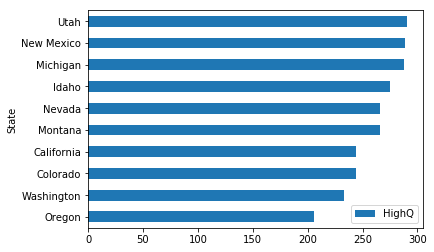

In [73]:
df.sort_values('HighQ').head(10).plot(x='State', y='HighQ', kind='barh')

#HighQ: high quality marijuana, price per ounce

In [74]:
top_five = df.sort_values('HighQ').head(5)
bottom_five = df.sort_values('HighQ').tail(5)

In [77]:
bottom_top_five = pd.concat([top_five, bottom_five], ignore_index=True)
bottom_top_five

# stack up the data

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Oregon,205.80,2179,180.90,2018,NaN,95
1,Washington,233.01,3341,189.92,3564,NaN,160
2,Colorado,243.72,3148,195.11,2877,NaN,178
3,California,243.96,16512,189.35,19151,NaN,1096
4,Montana,265.51,738,241.42,364,NaN,32
5,Iowa,364.92,975,289.05,1045,NaN,122
6,Virginia,364.95,3514,293.02,3085,NaN,285
7,Maryland,366.01,2863,255.84,2463,NaN,193
8,Vermont,371.23,357,308.86,367,NaN,32
9,North Dakota,393.94,213,339.60,327,NaN,23


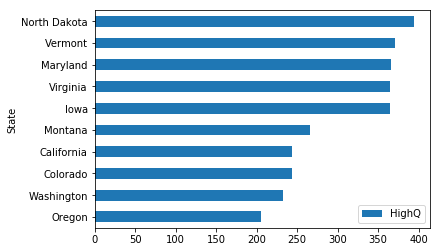

In [78]:
bottom_top_five.plot(x='State', y='HighQ', kind='barh')

#df.plot(x='State', y='HighQ', kind='barh', figsize=(5, 20), title='Hier kommt ein Titel")
#ax.set_xlabel("This is an x label") --> schreibt dir x-Axchse an
#ax.xaxis.set_label("Trying this another day") 
#ax.set_title{"something else"}

## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

In [22]:
import matplotlib.ticker as ticker

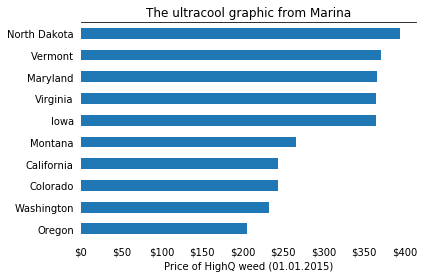

In [89]:
bottom_and_top_five_plot = bottom_top_five.plot(x='State', y='HighQ', kind="barh", legend=False)
bottom_and_top_five_plot.set_title("The ultracool graphic from Marina")
bottom_and_top_five_plot.set_xlabel("Price of HighQ weed (01.01.2015)")
bottom_and_top_five_plot.set_ylabel("")
bottom_and_top_five_plot.spines['top'].set_visible(True)
bottom_and_top_five_plot.spines['bottom'].set_visible(False)
bottom_and_top_five_plot.spines['left'].set_visible(False)
bottom_and_top_five_plot.spines['right'].set_visible(False)
bottom_and_top_five_plot.tick_params(axis='both', bottom='off', left='off')
bottom_and_top_five_plot.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [20]:
import glob 

In [28]:
filenamelist = glob.glob("data/*.csv") 

In [29]:
filenamelist

['data/weedprices01012014.csv',
 'data/weedprices01012015.csv',
 'data/weedprices01022014.csv',
 'data/weedprices01022015.csv',
 'data/weedprices01032014.csv',
 'data/weedprices01042014.csv',
 'data/weedprices01052014.csv',
 'data/weedprices01062014.csv',
 'data/weedprices01062015.csv',
 'data/weedprices01072014.csv',
 'data/weedprices01072015.csv',
 'data/weedprices01082014.csv',
 'data/weedprices01092014.csv',
 'data/weedprices01102014.csv',
 'data/weedprices01112014.csv',
 'data/weedprices01122014.csv',
 'data/weedprices02012014.csv',
 'data/weedprices02012015.csv',
 'data/weedprices02022014.csv',
 'data/weedprices02022015.csv',
 'data/weedprices02032014.csv',
 'data/weedprices02042014.csv',
 'data/weedprices02052014.csv',
 'data/weedprices02062014.csv',
 'data/weedprices02062015.csv',
 'data/weedprices02072014.csv',
 'data/weedprices02072015.csv',
 'data/weedprices02092014.csv',
 'data/weedprices02102014.csv',
 'data/weedprices02112014.csv',
 'data/weedprices02122014.csv',
 'data/w

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [26]:
#mylist = [1,2,3]

1
2
3


[None, None, None]

In [90]:
price_dfs = [pd.read_csv(filename) for filename in filenamelist]

In [95]:
price_dfs[0]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222
3,Arkansas,$361.85,576,$185.62,544,$125.87,112
4,California,$248.78,12096,$193.56,12812,$192.92,778
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91
7,Delaware,$373.18,347,$226.25,273,$199.88,34
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39
9,Florida,$306.43,6506,$220.03,5237,$158.26,514


## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [96]:
df.head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37


In [97]:
df.tail(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
49,Wisconsin,350.49,2246,272.73,2222,NaN,167
50,Wyoming,320.39,133,351.86,197,NaN,12


## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [48]:
for filename, price_df in zip(filenamelist, price_dfs):
    price_df['filename'] = filename

In [47]:
price_dfs[0]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,marina
1,Alaska,$288.75,252,$260.6,297,$388.58,26,marina
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,marina
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,marina
4,California,$248.78,12096,$193.56,12812,$192.92,778,marina
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,marina
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,marina
7,Delaware,$373.18,347,$226.25,273,$199.88,34,marina
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,marina
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,marina


## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [101]:
price_dfs_all = pd.concat(price_dfs, ignore_index=True)

In [103]:
price_dfs_all

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222
3,Arkansas,$361.85,576,$185.62,544,$125.87,112
4,California,$248.78,12096,$193.56,12812,$192.92,778
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91
7,Delaware,$373.18,347,$226.25,273,$199.88,34
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39
9,Florida,$306.43,6506,$220.03,5237,$158.26,514


## Pull out the day, month and year from each filename

Do **not** store it back yet!

## Okay, now add all three columns back at once

You should rename the columns first!

## Plot the change in marijuana prices in Oregon over time

## Plot the change in marijuana prices in all states over time

In [ ]:
ax = df.head().plot(
ax.set_title("Weed prices")
ax.grid(axis='x')

In [ ]:
extracted = [name],[number]

pd.concat([df, extracted]), axis=1) #Kolonne heisst nun 0 und 1